Make sure you installed ***sklearn***, ***matplotlib*** and ***numpy*** if you use your local machine

In [1]:
!pip install scikit-learn-extra
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.5 MB/s eta 0:00:00


In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn_extra
import scipy
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.cluster
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram


In [4]:
categories = ['soc.religion.christian', 'sci.space', 'rec.sport.hockey', 'comp.sys.mac.hardware', 'sci.med']
# categories = ['alt.atheism', 'soc.religion.christian']
# categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
# categories = ['rec.sport.baseball', 'rec.sport.hockey']
# 'alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
# 'comp.sys.mac.hardware','comp.windows.x', 'misc.forsale', 'rec.autos',
# 'rec.motorcycles',  'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
# 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns',
# 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'
train = sklearn.datasets.fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'),)
test = sklearn.datasets.fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'),)
print('train data size:', len(train.data))
print('test data size:', len(test.data))

train data size: 2964
test data size: 1972


# Nearest Neighbors

In [5]:
idx = 200
inst = train.data[idx]
print(train.data[idx])

I believe it goes or will go:
680060
powerPC
Pentium
680040
486
680030
386
680020
286=680000

In a resent article in one of the macMags I think a 50mHz 030 accelerator was
 slightly slower than a 25mHz 040 accel. But, this is using a system designed
 for the 030. So, It stands to reason that a system designed for an 040 ie
 quadra) would do better. So overall I'd figure 040 = 030 * 2.5 or so.
    Along the same lines the new POwerPC stuff is supposed to run the system
 at the level of a fast quadra, but system 8 or whatever will allow 3 times the
 speed of a 040 in the powerPC based systems. and wait for the 680060. I think
 it laps the pentium.

pro-life pro-women




In [6]:
import pandas as pd
pd.set_option('display.max_colwidth', 0)

idx = 200
inst = train.data[idx]
train.target_names[train.target[idx]]
pd.DataFrame.from_dict({'category':[train.target_names[train.target[idx]]], 'email':[inst]})

,category,email
0,comp.sys.mac.hardware,"I believe it goes or will go:\n680060\npowerPC\nPentium\n680040\n486\n680030\n386\n680020\n286=680000\n\nIn a resent article in one of the macMags I think a 50mHz 030 accelerator was\n slightly slower than a 25mHz 040 accel. But, this is using a system designed\n for the 030. So, It stands to reason that a system designed for an 040 ie\n quadra) would do better. So overall I'd figure 040 = 030 * 2.5 or so.\n Along the same lines the new POwerPC stuff is supposed to run the system\n at the level of a fast quadra, but system 8 or whatever will allow 3 times the\n speed of a 040 in the powerPC based systems. and wait for the 680060. I think\n it laps the pentium.\n\npro-life pro-women\n\n"


,category,email
0,comp.sys.mac.hardware,"dhk@ubbpc.uucp (Dave Kitabjian) writes ...\n\n040 486 030 386 020 286\n\n\n060 fastest, then Pentium, with the first versions of the PowerPC\nsomewhere in the vicinity.\n\n\nNo. Computer speed is only partly dependent of processor/clock speed.\nMemory system speed play a large role as does video system speed and\nI/O speed. As processor clock rates go up, the speed of the memory\nsystem becomes the greatest factor in the overall system speed. If\nyou have a 50MHz processor, it can be reading another word from memory\nevery 20ns. Sure, you can put all 20ns memory in your computer, but\nit will cost 10 times as much as the slower 80ns SIMMs.\n\nAnd roughly, the 68040 is twice as fast at a given clock\nspeed as is the 68030.\n"
1,comp.sys.mac.hardware,"I'm thinking about upgrading my 030 50MHz to the 040 33version. Has anyone\nhad any experience with the accelerator, and if so - what do you think?\nAny problems, what are the speedometer results?, is it much faster than\nthe 50MHz? Basically, I'd appreciate hearing all about this product. Please\nrespond via email, and I'll summarize if there's a big response. thanks\nin advance, Andrew\n"
2,comp.sys.mac.hardware,"\nRadius speculated, publicly, that they could provide a PowerPC-based\nRocket for existing Macs. It would have the plus of RocketShare and\nthe minus of NuBus accelerators - no true boot off the accelerator,\nNuBus bottleneck to video and other I/O.\n\nApple, it seems, will not compete with third parties here -- except\nperhaps for not-yet-available Macs like Cyclone, where a PowerPC\nslot might be advertised. Look for Daystar and such to make PowerPC\naccelerators.\n\nOne potential problem with any accelerator, though, is that it will\nneed a ROM companion and Apple has licensed only Radius, with\nRocketshare, to use any of its proprietary code.\n\nApple is, between the lines, trying to let us know that PowerPC Macs\nwill have simplified logic boards due to the magical nature of RISC\nand that these boards should be much cheaper to build than those in\nexisting 68040 Macs. Perhaps, then, we'll see groundbreaking\nprices in Mac-logic board upgrades, much the same way we've seen\nmuch cheaper high-performance CPUs this year.\n\nFirst generation PowerPCs, 98601s, will also hopefully have socketed\nCPUs so that they'll be chip upgradeable to 98604s a year later.\nThis should be possible in much the same way that 486s can be pulled\nfor clock doublers. If there is too much technical baggage (which\nI doubt since the external busses are the same size/width) to do\nthis, perhaps we can have CPU daughterboard, a la Powerbook, as\nstandard to facilitate better CPU upgrades. This is an area where\nApple has fallen far behing the Intel-based world. Perhaps catchup\nis in order.\n\nBy the way, last week's PC week had an excellent story on PowerPC,\nPentium, MIPS R4000, DEC Alpha (the big four on the microprocessor\nfront for the forseeable future). Worth reading for technojunkies.\nAlso, the latest PC has a cover story on Pentium. Read it, and all\nthe other stories about how Intel is unstoppable and preeminent\nright now.\n\nOnce anyone is this secure, they are due to fall. Intel's market\nposition will never again be as dominant as it is today (especially\nif AMD gets the go ahead to sell its 486s this week as it appears it\nmight). The competition from all fronts is gearing up for an awesome\nbattle. Apple users should be excited that PowerPC, while not\nguaranteed dominance, is a guaranteed winner, even if its one of\nseveral."
3,comp.sys.mac.hardware,"\n\n\tI think this kind of comparison is pretty useless in general. The\nprocessor is only good when a good computer is designed around it adn the\ncomputer is used in its designed purpose. Comparing processor speed is\npretty dumb because all you have to do is just increase the clock speed\nto increase speed among other things.\n\n\tI mean how can you say a 040 is faster than a 486 witho

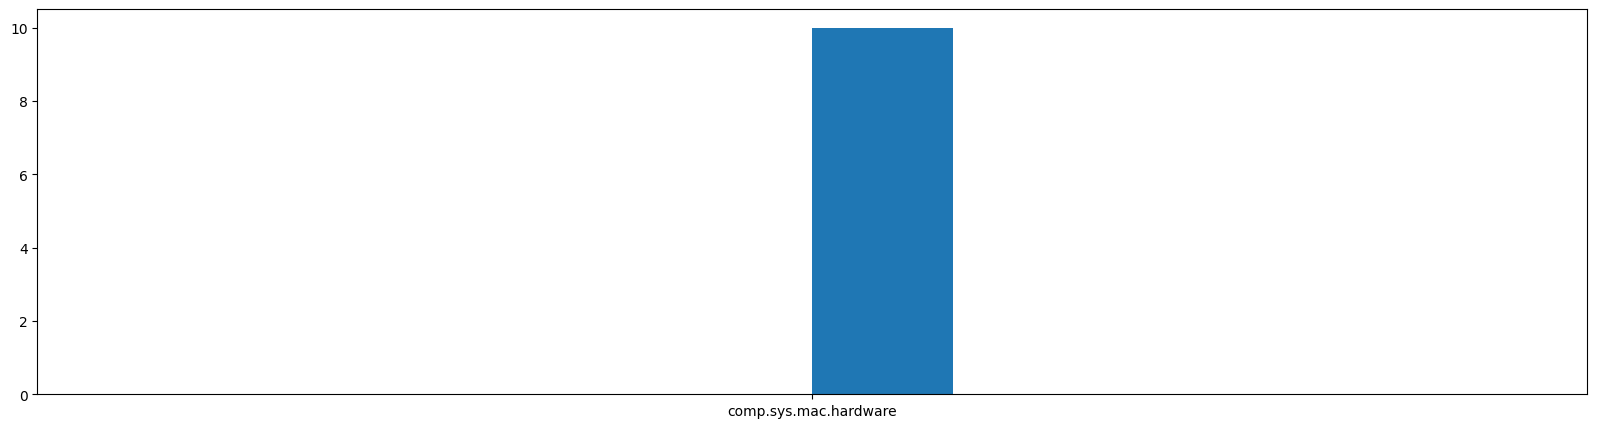

In [7]:
num_neighs = 10

metric = 'cosine' # or 'cosine', 'l1', 'l2'
features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True) #create TfIDF vectorizer
train.vecs = features.fit_transform(train.data) #Convert all train data to TfIDF vector representation
nbrs = NearestNeighbors(n_neighbors=num_neighs+1, algorithm='brute', metric=metric).fit(train.vecs)
distances, indices = nbrs.kneighbors(train.vecs[idx])
# for nidx in indices[indices!=idx]:
#   print('-----')
#   print(train.target_names[train.target[nidx]])
#   print(train.data[nidx])
plt.rcParams["figure.figsize"] = (20,5)
plt.hist([train.target_names[nidx] for nidx in train.target[indices[indices!=idx]]])
pd.DataFrame.from_dict({'category':[train.target_names[nidx] for nidx in train.target[indices[indices!=idx]]], 'email':[train.data[nidx] for nidx in indices[indices!=idx]]})

In [8]:
print(distances)
print(indices)

[[3.77475828e-15 8.86509786e-01 9.05273544e-01 9.10775460e-01
  9.15960768e-01 9.16354152e-01 9.23602473e-01 9.25686174e-01
  9.28577661e-01 9.30284877e-01 9.36324659e-01]]
[[ 200 2771 1460 1635 1608  398  914 2782  775  349  336]]


# KMeans

In [9]:
#random.seed(a = 200)
features = TfidfVectorizer(ngram_range=(1,1), stop_words= 'english', lowercase=True, max_features=2000, max_df=0.9)
train.vecs = features.fit_transform(train.data)

(array([  71.,  223.,    0., 1066.,    0.,  551.,  404.,    0.,  306.,
         343.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

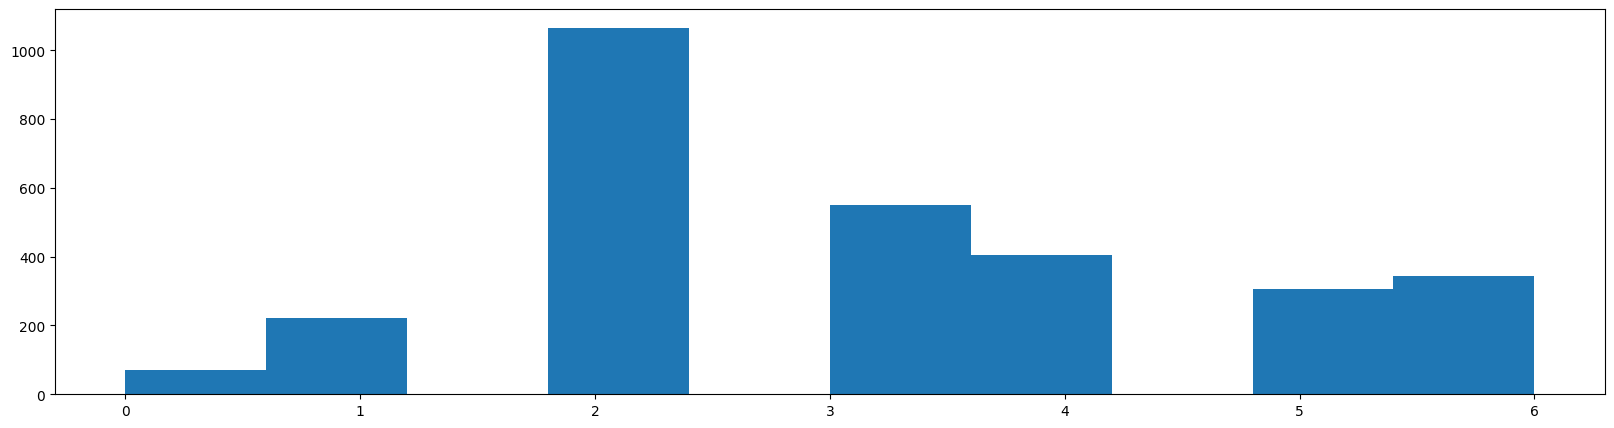

In [10]:
clusterer = KMeans(n_clusters=7, init='k-means++', max_iter=500, n_init=5, algorithm="lloyd")
clusts = clusterer.fit_predict(train.vecs)
plt.hist(clusts)

In [11]:
clusts[1:20]

array([2, 0, 2, 5, 0, 4, 1, 3, 2, 2, 4, 2, 6, 0, 2, 2, 2, 2, 3],
      dtype=int32)

In [12]:
def purity_score(c, y):
  '''From: http://www.caner.io/purity-in-python.html'''
  A = np.c_[(c,y)]
  n_accurate = 0.
  for j in np.unique(A[:,0]):
    z = A[A[:,0] == j, 1]
    x = np.argmax(np.bincount(z))
    n_accurate += len(z[z == x])
  return n_accurate / A.shape[0]

def cluster_purity(c, y):
  numy = len(set(y))
  cvals = list(set(c)) #[str(ce) for ce in list(set(c))]
  numc = len(cvals)
  ind = [str(cval) for cval in cvals] #np.arange(numc)
  bottom = np.zeros(numc)
  for yidx in range(numy):
    counts = np.zeros(numc)
    for cidx in range(numc):
      num = len(list(filter(lambda p: p[0]==cvals[cidx] and p[1]==yidx, zip(c,y))))
      counts[cidx] = num
    plt.bar(ind, counts,label=train.target_names[yidx],bottom=bottom)
    bottom = bottom + counts
  plt.legend()

Purity: 0.645748987854251


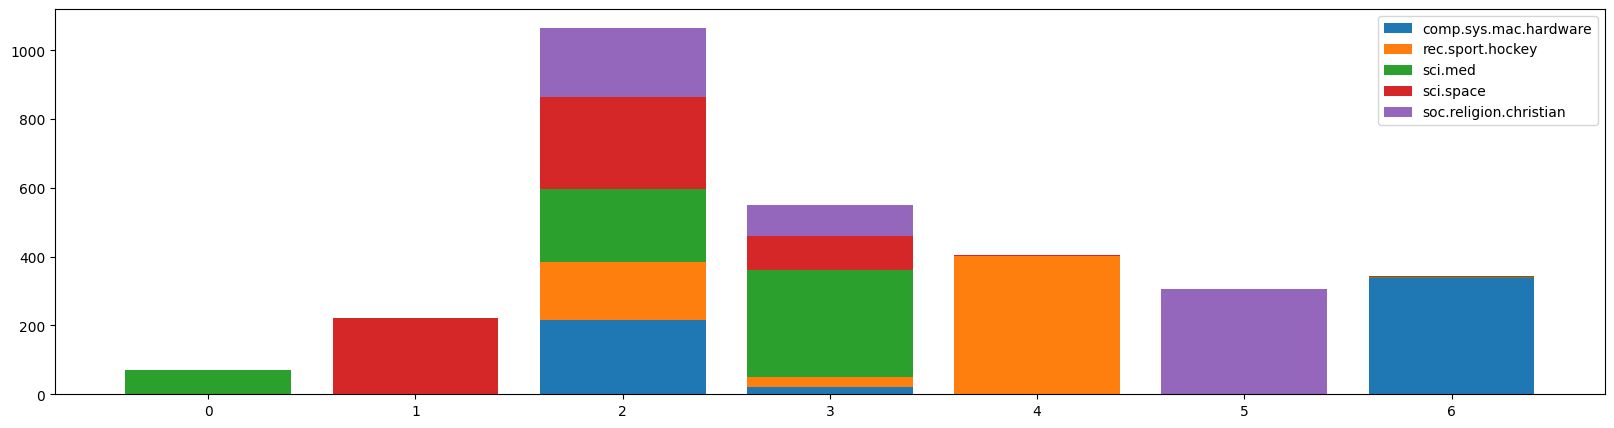

In [13]:
cluster_purity(clusts, train.target)
print('Purity:', purity_score(clusts, train.target))

k= 1 done, purity: 0.20242914979757085
k= 2 done, purity: 0.31950067476383265
k= 3 done, purity: 0.4507422402159244
k= 4 done, purity: 0.4949392712550607
k= 5 done, purity: 0.5802968960863698
k= 6 done, purity: 0.6815114709851552
k= 7 done, purity: 0.6531713900134952
k= 8 done, purity: 0.6774628879892037
k= 9 done, purity: 0.6852226720647774
k= 10 done, purity: 0.7375168690958165
k= 11 done, purity: 0.6926450742240216
k= 12 done, purity: 0.6946693657219973
k= 13 done, purity: 0.6727395411605938
k= 14 done, purity: 0.6339406207827261
k= 15 done, purity: 0.6875843454790823
k= 16 done, purity: 0.6794871794871795
k= 17 done, purity: 0.6568825910931174
k= 18 done, purity: 0.6730769230769231
k= 19 done, purity: 0.6639676113360324


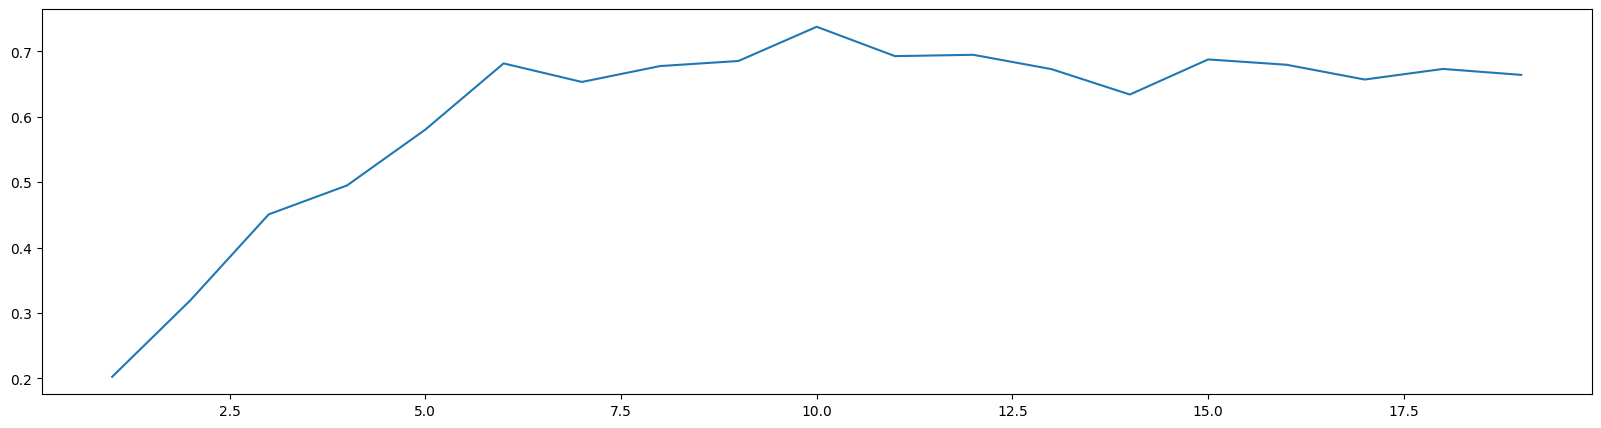

In [14]:
import nltk

purity = []
wcss=[]

krange = range(1,20)
for k in krange:
  tclusterer = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=5, algorithm="lloyd")
  clusts = tclusterer.fit_predict(train.vecs)
  purity.append(purity_score(clusts, train.target))
  wcss.append(tclusterer.inertia_)
  print('k=',k,'done, purity:', purity[k-1])

#plt.plot(krange, wcss)
plt.plot(krange, purity)

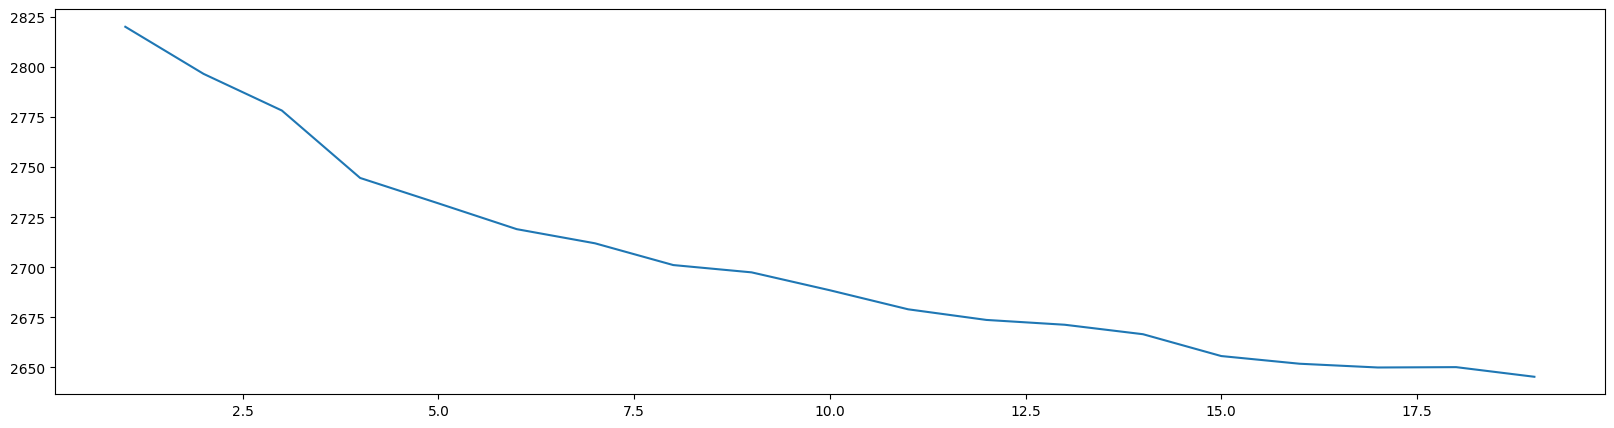

In [15]:
plt.plot(krange, wcss)

(array([329., 408.,  38., 874.,   0., 529., 339.,  71., 185., 191.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

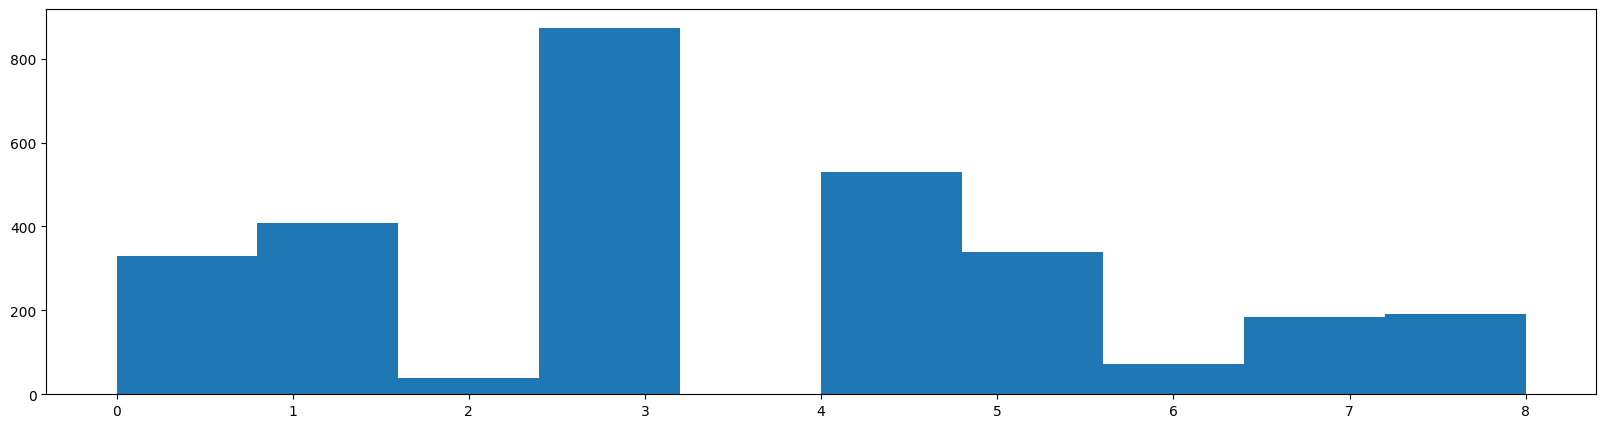

In [16]:
#random.seed(a = 200)
features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True, max_features=2000, max_df=0.9)
train.vecs = features.fit_transform(train.data)

clusterer = KMeans(n_clusters=9, init='k-means++', max_iter=100, n_init=10)
clusts = clusterer.fit_predict(train.vecs)
plt.hist(clusts)

Purity: 0.659919028340081


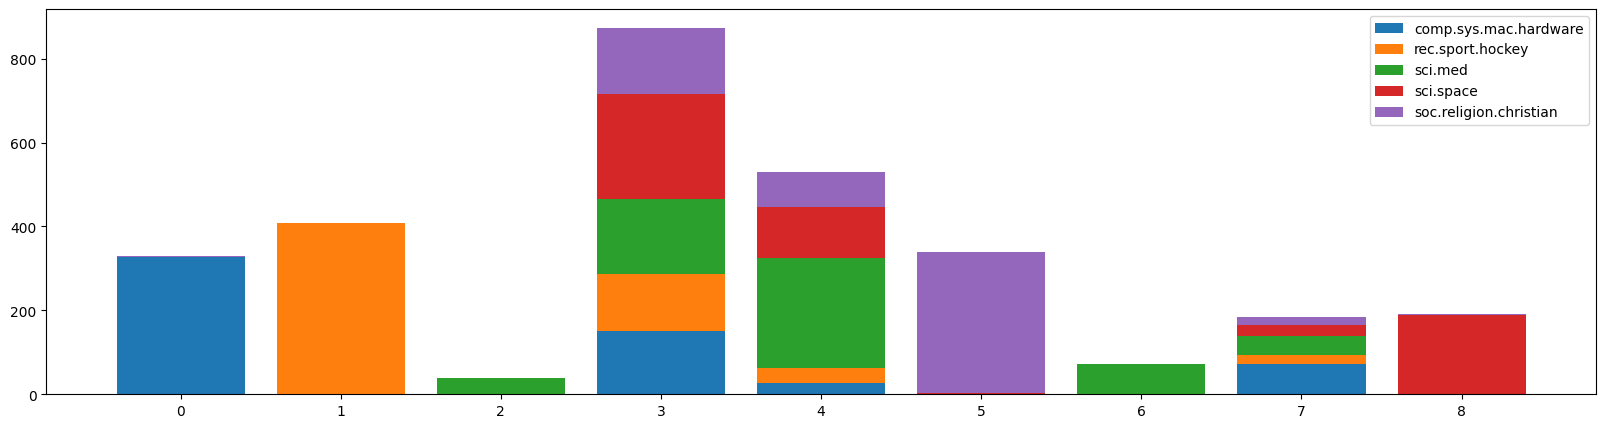

In [17]:
cluster_purity(clusts, train.target)
print('Purity:', purity_score(clusts, train.target))

In [18]:
centroids = clusterer.cluster_centers_

In [19]:
train.vecs[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [20]:
print(centroids)

[[2.44612650e-03 1.26014734e-03 0.00000000e+00 ... 3.39648522e-04
  0.00000000e+00 5.32145039e-04]
 [4.93773848e-03 4.21076578e-03 4.85050705e-05 ... 7.07560407e-03
  3.54514501e-03 4.89445548e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.88224081e-03 0.00000000e+00]
 ...
 [0.00000000e+00 4.13563677e-03 0.00000000e+00 ... 0.00000000e+00
  1.95135648e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00706088e-03
  2.23000415e-03 0.00000000e+00]
 [6.98760616e-03 7.61022631e-03 0.00000000e+00 ... 8.45032376e-04
  1.92507421e-03 0.00000000e+00]]


In [21]:
#pd.DataFrame.from_dict({'category':[train.target_names[train.target[1392]]], 'email':[train.data[1392]]})

In [22]:
nbrs = NearestNeighbors(n_neighbors=num_neighs+1, algorithm='brute', metric=metric).fit(train.vecs)
distance, indices = nbrs.kneighbors(centroids)

In [23]:
indices

array([[1392,  673, 2805,  936,  822, 1999,  256, 2000,  569, 2544, 2238],
       [1150,  876, 2608, 1448, 1084, 2393,  644, 2315, 2457,  892,  982],
       [2698, 1700, 2022, 1247, 1753, 1884, 1556, 1302,   88, 1091, 1851],
       [2086,  154,  427, 2564, 2135, 1685, 1071,  934, 2957, 1111, 1242],
       [2086,  154,  427, 1685, 1242,  917, 1028, 1829, 2559,  934,  373],
       [1126, 2746, 1402, 1976,  719, 2568, 1678, 1357, 2250,  304,  998],
       [1381,   20,  671,  827, 2910, 1107, 1377, 1329, 1548,  720,   14],
       [2109, 2919,  564,   75, 2131, 1226, 1407,   81,  480, 1584, 1378],
       [ 335,  582, 2564, 1153, 1380,  365,  628,  356, 2467, 2277, 2872]])

In [24]:
print('Document closest to Cluster 1:\n', train.data[1150])

Document closest to Cluster 1:
 Archive-name: hockey-faq

rec.sport.hockey answers to Frequently Asked Questions and other news:
 
Contents:

0. New Info.
1. NHL
2. NHL Minor Leagues
3. College Hockey (North America)
4. Other leagues (e.g. Europe, Canada Cup tournament)
5. E-mail files
6. USENET Hockey Pool
7. Up-coming Dates
8. Answers to some frequently asked questions
9. Miscellaneous
 
 Send comments, suggestions and criticisms regarding this FAQ list via e-
mail to hamlet@u.washington.edu.
 
--------------------------------------------------------------------------
 
 0. New Info.
 
 This section will describe additions since the last post so that you can 
decide if there is anything worth reading. Paragraphs containing new 
information will be preceded by two asterisks (**).

 1.: New Anaheim contact, Winnipeg to keep affiliate in Moncton.
 2.: New Milwaukee contact, IHL broadcaster of the year named, Rheaume to 
start against Cyclones, San Diego sets record.
 3.: Ticket info inc

# DBScan

In [25]:
features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True, max_features=1000, max_df=0.7, min_df=10)
train.vecs = features.fit_transform(train.data)
eps_range = np.arange(0.5,0.9,0.05)
max_purity = 0
for i in range(len(eps_range)):
    for j in range(2, 20, 2):
        clusterer = sklearn.cluster.DBSCAN(eps=eps_range[i], min_samples=j, metric='cosine')
        clusts = clusterer.fit_predict(train.vecs)
        score = purity_score(clusts, train.target)
        print('Purity:', eps_range[i], ",", j, "::",  score)
        if( score > max_purity):
            opt_eps = eps_range[i]
            opt_min_sample = j
            max_purity = score



Purity: 0.5 , 2 :: 0.4642375168690958
Purity: 0.5 , 4 :: 0.3684210526315789
Purity: 0.5 , 6 :: 0.3248987854251012
Purity: 0.5 , 8 :: 0.286774628879892
Purity: 0.5 , 10 :: 0.2584345479082321
Purity: 0.5 , 12 :: 0.24898785425101214
Purity: 0.5 , 14 :: 0.24595141700404857
Purity: 0.5 , 16 :: 0.23650472334682862
Purity: 0.5 , 18 :: 0.23616734143049933
Purity: 0.55 , 2 :: 0.5195681511470985
Purity: 0.55 , 4 :: 0.4541160593792173
Purity: 0.55 , 6 :: 0.40620782726045884
Purity: 0.55 , 8 :: 0.3694331983805668
Purity: 0.55 , 10 :: 0.31545209176788125
Purity: 0.55 , 12 :: 0.28441295546558704
Purity: 0.55 , 14 :: 0.26720647773279355
Purity: 0.55 , 16 :: 0.26720647773279355
Purity: 0.55 , 18 :: 0.25303643724696356
Purity: 0.6000000000000001 , 2 :: 0.3765182186234818
Purity: 0.6000000000000001 , 4 :: 0.39946018893387314
Purity: 0.6000000000000001 , 6 :: 0.407557354925776
Purity: 0.6000000000000001 , 8 :: 0.46288798920377866
Purity: 0.6000000000000001 , 10 :: 0.4139676113360324
Purity: 0.60000000000

(array([2142.,  360.,  133.,   50.,   95.,   62.,   28.,   33.,   28.,
          33.]),
 array([-1. ,  2.4,  5.8,  9.2, 12.6, 16. , 19.4, 22.8, 26.2, 29.6, 33. ]),
 <BarContainer object of 10 artists>)

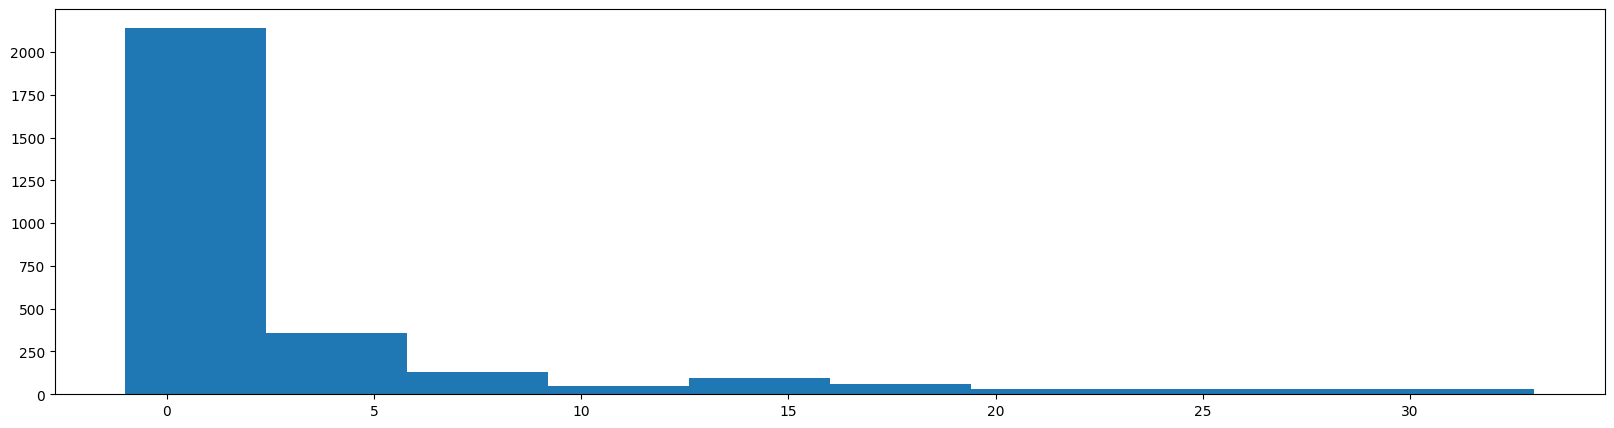

In [26]:
opt_min_sample = 8
opt_eps = 0.6

clusterer = sklearn.cluster.DBSCAN(eps=opt_eps, min_samples=opt_min_sample, metric='cosine')
clusts = clusterer.fit_predict(train.vecs)
plt.hist(clusts)

Purity: 0.46288798920377866


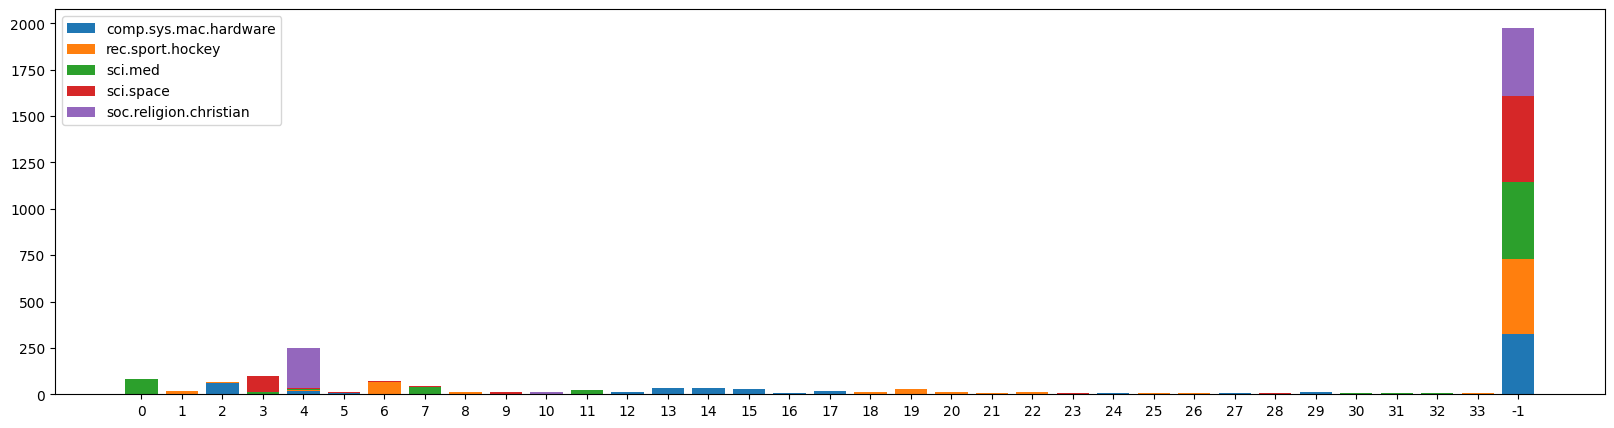

In [27]:

cluster_purity(clusts, train.target)
print('Purity:', purity_score(clusts, train.target))

In [28]:
opt_eps, opt_min_sample

(0.6, 8)

Purity: 0.46288798920377866


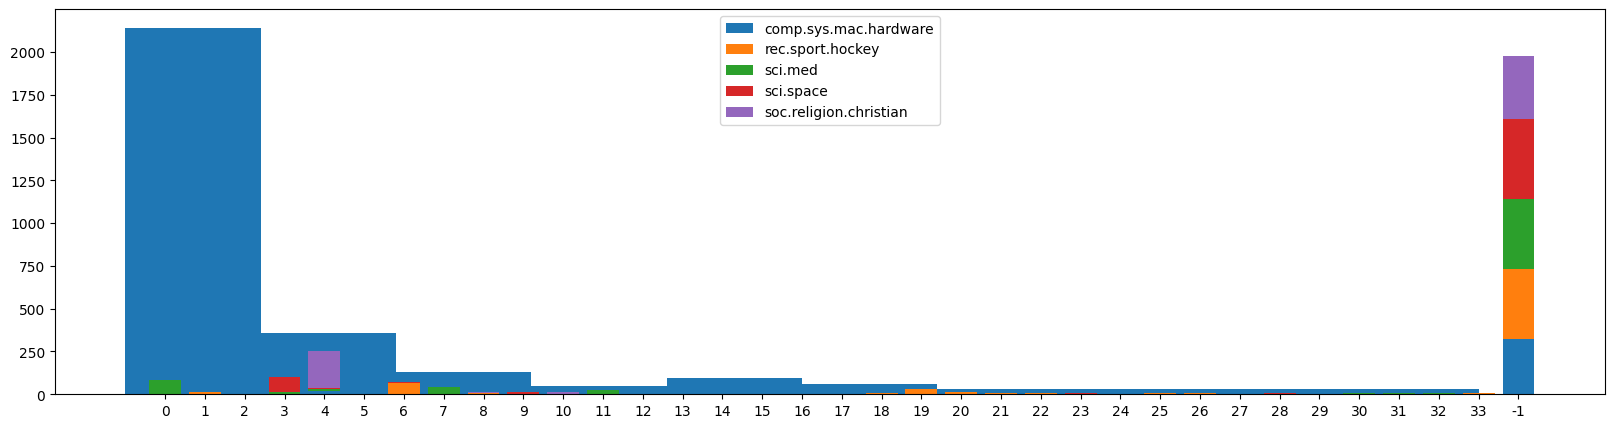

In [29]:
clusterer = sklearn.cluster.DBSCAN(eps=opt_eps, min_samples=opt_min_sample, metric='cosine')
clusts = clusterer.fit_predict(train.vecs)
plt.hist(clusts)

cluster_purity(clusts, train.target)
print('Purity:', purity_score(clusts, train.target))

In [30]:
### Compare the results you are getting from K-Means and DBScan and suggestion which ones will you use for this dataset. Please provide qualitative and quantitative reasoning.

# Agglomerative Clustering

In [42]:
num_points = 500
data = train.data[:num_points]
target= train.target[:num_points]
features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True, max_features=300)
vecs = features.fit_transform(data)
clusterer = sklearn.cluster.AgglomerativeClustering(metric='euclidean', linkage="ward")
clusts = np.array(clusterer.fit_predict(vecs.toarray()))

In [43]:
def clustering_from_tree(clusterer, i):
  n_samples = clusterer.n_leaves_
  nodes = clusterer.children_
  pclusts = np.arange(n_samples)
  def label_clust(nid, label):
    if nid < n_samples:
      pclusts[nid] = label
    else:
      lchild = nodes[nid-n_samples][0]
      label_clust(lchild, label)
      rchild = nodes[nid-n_samples][1]
      label_clust(rchild, label)

  #simulate the clustering
  for j in range(i):
    lchild = nodes[j][0]
    label_clust(lchild, n_samples+j)
    rchild = nodes[j][1]
    label_clust(rchild, n_samples+j)
  return pclusts



Number of clusters 10


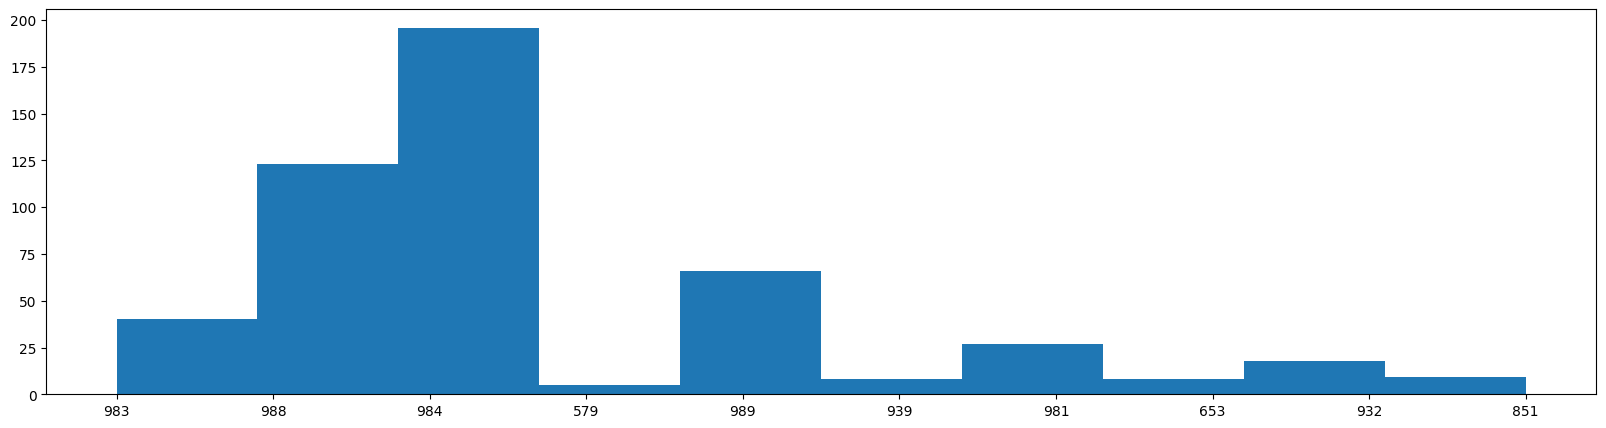

In [44]:
clusts = clustering_from_tree(clusterer, 490)
plt.hist([str(c) for c in clusts])
print("Number of clusters", len(list(set(clusts))))

Purity: 0.5


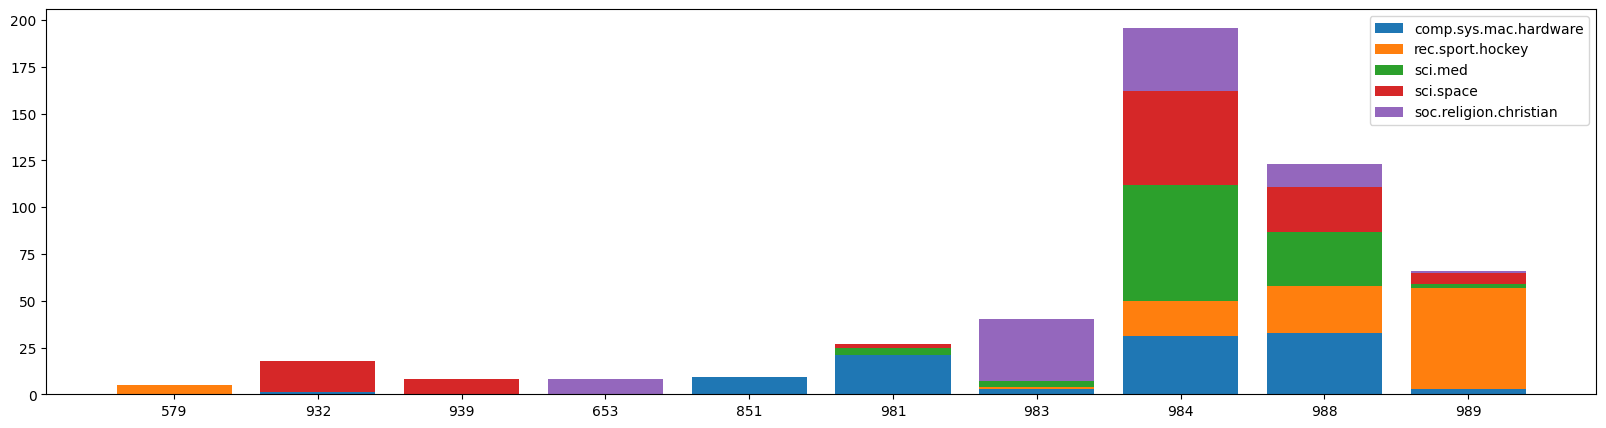

In [45]:
cluster_purity(clusts, target)
print('Purity:', purity_score(clusts, target))

Number of clusters 400


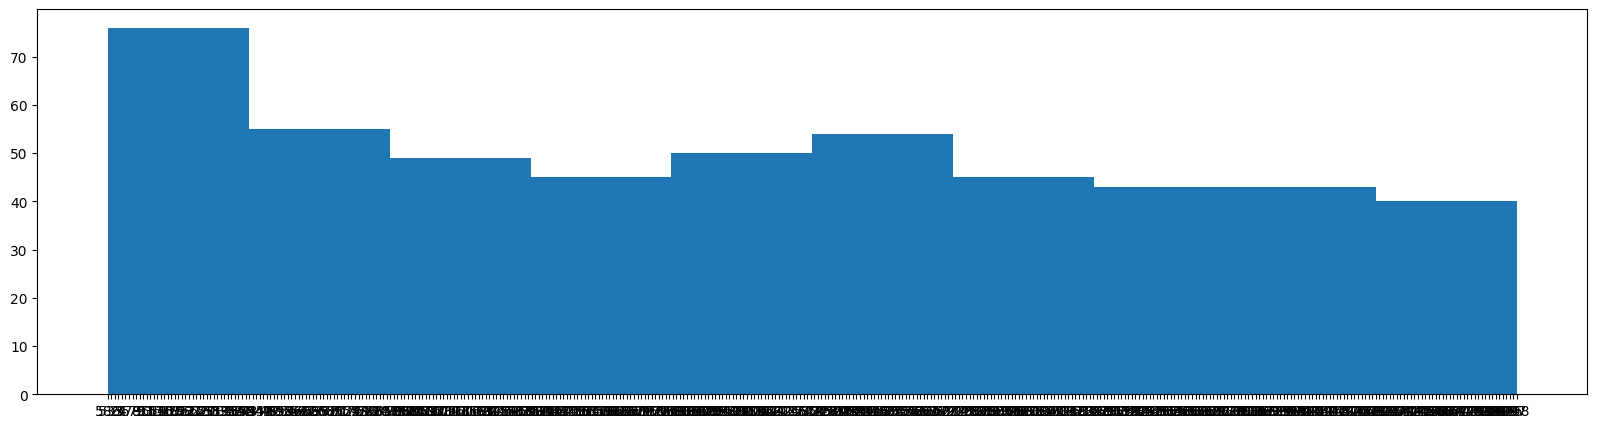

In [52]:
clusts = clustering_from_tree(clusterer, 100)
plt.hist([str(c) for c in clusts])
print("Number of clusters", len(list(set(clusts))))

Purity: 0.928


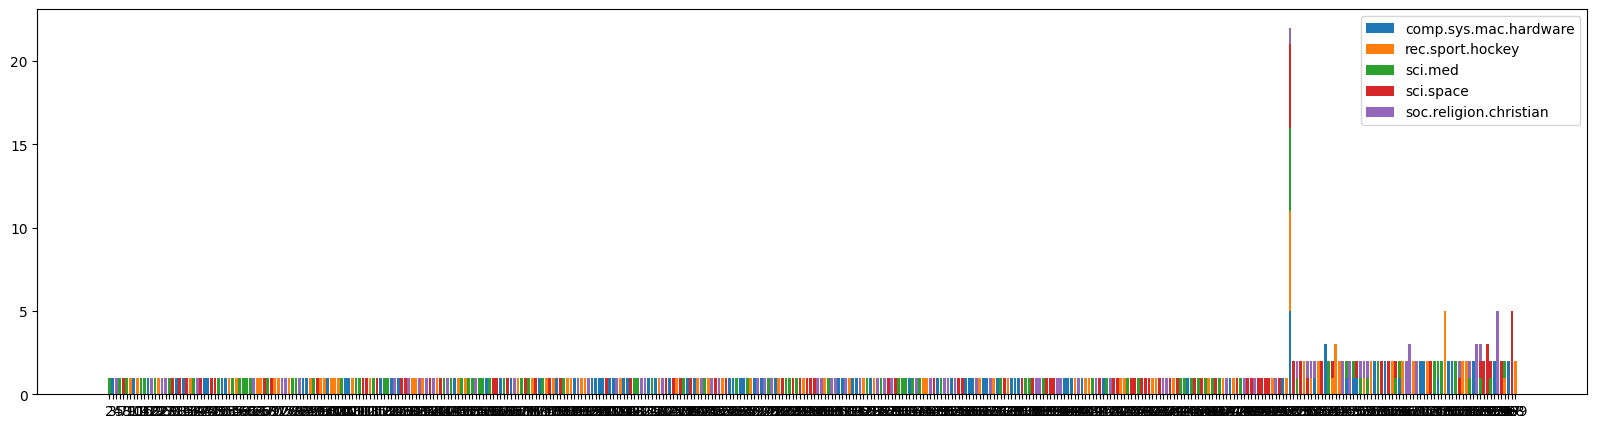

In [47]:
cluster_purity(clusts, target)
print('Purity:', purity_score(clusts, target))

Text(0, 0.5, 'Purity')

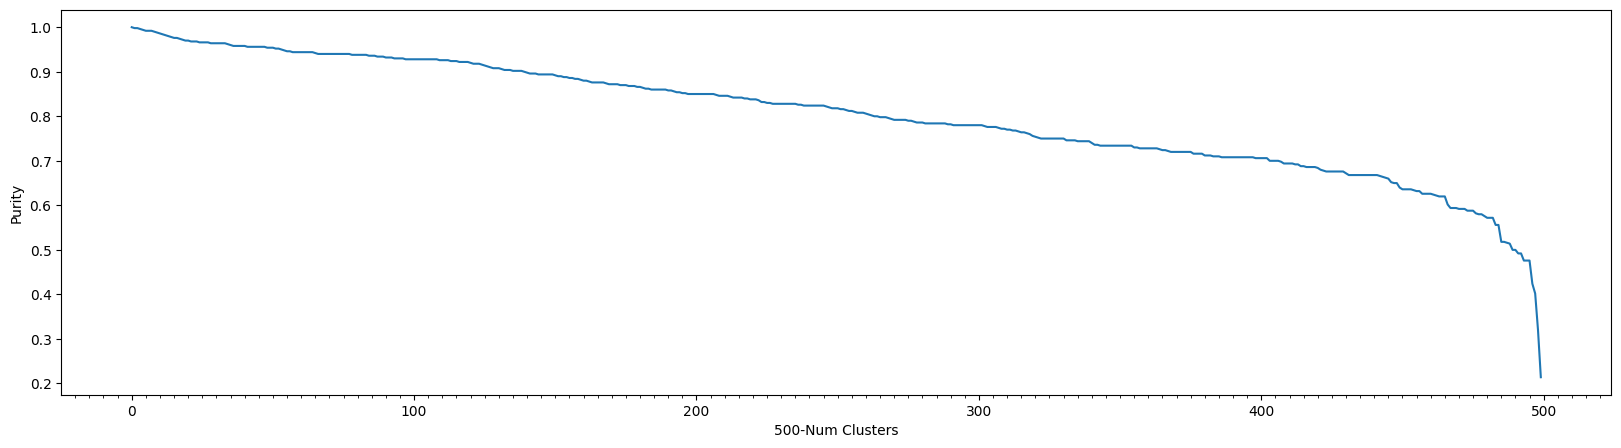

In [48]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

numcs = []
purities = []
for i in range(num_points):
  clusts = clustering_from_tree(clusterer, i)
  numc = len(list(set(clusts)))
  numcs.append(numc)
  purities.append(purity_score(clusts, target))

fig, ax = plt.subplots()
ax.plot(range(num_points), purities)

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_xlabel('500-Num Clusters')
ax.set_ylabel('Purity')

In [49]:
import scipy.cluster.hierarchy as sch

In [50]:
print(clusterer.fit_predict(vecs.toarray()))

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 

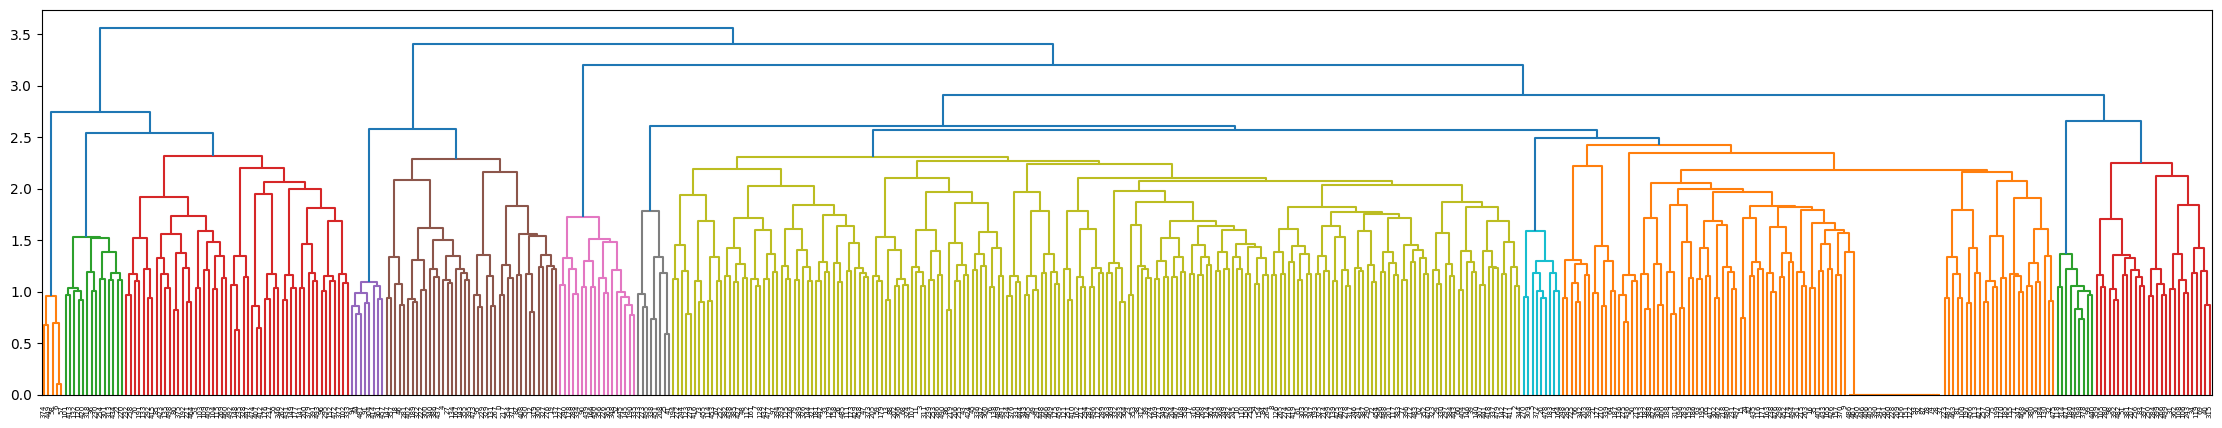

In [51]:
plt.figure(figsize=(28,5))
dend = sch.dendrogram(sch.linkage(vecs.toarray(), method='ward'))
plt.show()

# WK5 Activity

Compare the hierachical clustering to K-means and DBScan, and suggest which method is most appropriate based on metrics like purity. Also suggest where you will use one approach v/s the other? Are there cases in this data set where you will prefer Hierarcical cluserting to other approaches?

In [ ]:
''' Analysis and Comparison of Clustering Methods
K-Means:
* Strengths: Relatively efficient, works well with spherical clusters, and easy to interpret.
* Weaknesses: Sensitive to initial centroid placement, assumes spherical clusters, and struggles with non-linearly separable data.  Performance is highly dependent on the chosen value for 'k', which often requires experimentation and evaluation metrics.
* Use Cases:  When you have a good estimate of the number of clusters and the data roughly conforms to spherical clusters.  Good for large datasets due to relative efficiency.

DBSCAN:
* Strengths:  Discovers clusters of arbitrary shapes, robust to noise and outliers. No need to pre-specify the number of clusters.
* Weaknesses:  Parameter sensitivity (eps and min_samples); struggles with varying densities; performance can be affected by high dimensionality
* Use Cases: When you suspect non-spherical clusters, have noisy data, and don't know the number of clusters a priori.

Hierarchical Clustering:
* Strengths:  Doesn't require pre-specifying the number of clusters. Provides a hierarchy of clusters which can be visualized via a dendrogram, allowing for flexible cluster selection.
* Weaknesses: Computationally expensive for large datasets, sensitive to distance metric choice. The dendrogram can be hard to interpret for large number of data points.
* Use Cases: When you want to explore different granularities of clusters or visualize the relationships between data points.  Useful when the number of clusters is unknown and you need to explore different levels of granularity.

Comparison based on Purity:
Purity measures the accuracy of cluster assignments.
From the code output, Hierarchical clustering gives the highest purity of 0.928.

When to prefer Hierarchical clustering over other approaches:
1. Exploring Cluster Hierarchies: If the goal is to understand the relationships among data points at different levels of granularity, the dendrogram generated by hierarchical clustering provides valuable insights.
                                  You can choose a suitable number of clusters by examining the dendrogram.  This is where hierarchical clustering has the advantage.
2. Unknown Number of Clusters:  If you don't have any idea about the number of clusters, hierarchical clustering avoids this problem since you don't have to pre-specify the number of clusters upfront.
                                You can experiment by cutting the dendrogram at various levels.
'''